In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def classification_metrics(target, pred):
    tn, fp, fn, tp = metrics.confusion_matrix(target, pred).ravel()
    acc = (tn + tp) / (tn + fp +fn + tp)
    sen = tp / (tp + fn)
    spc = tn / (tn + fp)
    prc = tp / (tp + fp)
    return acc, sen, spc, prc

In [3]:
data = load_breast_cancer()
X, y = data['data'], data['target']

In [4]:
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

In [5]:
n_repeat = 100
result_df = pd.DataFrame(columns=['acc', 'sen', 'spc', 'prc', 'auc'])

for i in range(n_repeat):
    
    # Split train and test data
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2)
    
    # Train the model
    model = LogisticRegression(max_iter = 100)
    model.fit(X_train, y_train)
    
    # Test the model
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    
    # Calculate metrics
    acc, sen, spc, prc = classification_metrics(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_prob)

    # Add to the dataframe
    result_df.loc[len(result_df)] = [acc, sen, spc, prc, auc]

In [6]:
result_df

,acc,sen,spc,prc,auc
0,0.973684,0.986667,0.948718,0.973684,0.995556
1,0.982456,0.985714,0.977273,0.985714,0.996753
2,0.991228,1.000000,0.974359,0.986842,0.996581
3,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.973684,1.000000,0.931818,0.958904,0.979221
...,...,...,...,...,...
95,0.973684,1.000000,0.930233,0.959459,0.984278
96,0.964912,1.000000,0.902439,0.948052,0.998664
97,0.947368,0.976190,0.866667,0.953488,0.970635
98,0.982456,0.987654,0.969697,0.987654,0.998878


In [7]:
result_df.mean()

acc    0.978246
sen    0.990236
spc    0.956986
prc    0.976147
auc    0.994359
dtype: float64

In [8]:
result_df.std()

acc    0.013223
sen    0.011827
spc    0.034779
prc    0.018167
auc    0.006135
dtype: float64

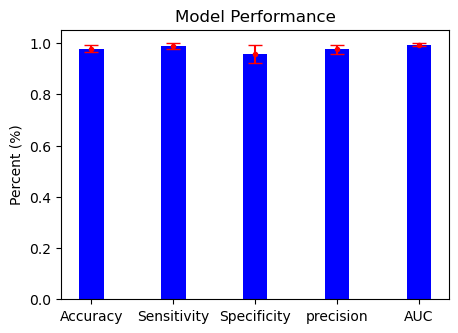

In [9]:
x = np.array(["Accuracy", "Sensitivity", "Specificity", "precision", "AUC"])
y = np.array(result_df.mean())
s = np.array(result_df.std())

fig, ax = plt.subplots(figsize=(5, 3.5)) 
plt.bar(x, y, width = 0.3, color = 'b')
ax.errorbar(x, y, yerr=s, fmt='.', color='r', capsize=5)

plt.ylabel("Percent (%)")
plt.title("Model Performance")
plt.show()